<a href="https://colab.research.google.com/github/Edugera/Templates_to_Articles/blob/main/Time_Series_Analysis_%E2%80%94_Part_II_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Análise de série temporal - Parte II / II](https://towardsdatascience.com/time-series-analysis-part-ii-ii-bece7ecc9647)
Florian Heinrichs


Como cientistas de dados, frequentemente enfrentamos dados que foram registrados ao longo do tempo. Esses dados podem ser dependentes e a distribuição do processo de geração de dados subjacente pode mudar com o tempo. Este tipo de dado é denominado série temporal e sua análise difere daquela de i.i.d. dados que são considerados em muitos cursos elementares de estatística.

As duas suposições de independência e estacionariedade simplificam dramaticamente a análise de séries temporais, então queremos saber se elas são razoáveis ​​em nosso cenário. Neste artigo, exploramos como justificar as duas suposições por meio de testes de hipóteses. Primeiro apresentamos os conceitos estatísticos e depois vemos as implementações dos testes em Python.

Na [parte 1](https://towardsdatascience.com/time-series-analysis-part-i-3be41995d9ad) desta minissérie sobre séries temporais, vimos exemplos de i.i.d. dados e séries temporais para compreender os dois conceitos de forma mais intuitiva e introduzir suas definições matemáticas.

*Nota: A seguir, consideramos apenas séries temporais fracamente dependentes, conforme apresentado na parte 1.*

#Teorema do limite central

Como entendemos i.i.d. dados e séries temporais um pouco melhor após a parte 1 desta minissérie, é hora de olhar para as diferenças entre eles e o teorema do limite central é um bom começo. O teorema do limite central basicamente sugere que a soma de uma sequência de variáveis ​​aleatórias pode ser aproximada por uma distribuição normal.

Mais especificamente, para uma sequência de i.i.d. variáveis ​​aleatórias X (1), ..., X (n) com a expectativa E [X (i)] = µ e variância Var (X (i)) = σ², pelo teorema do limite central que ele mantém

Imagem para postagem

https://miro.medium.com/max/561/1*2BZlEb7XfRX4gZWXljmmSg.png


onde a seta na equação acima denota convergência na distribuição (ou convergência fraca).

As coisas ficam um pouco mais complicadas para as séries temporais. Embora existam teoremas de limite centrais também para séries temporais não estacionárias, mantemos as coisas simples e nos restringimos a séries temporais estacionárias. Para séries temporais estacionárias fracamente dependentes X (1),…, X (n) com expectativa E [X (i)] = μ e variância de longo prazo σ², o teorema do limite central se mantém como antes. Observe que, neste caso, a variância no limite é a variância de longo prazo da série temporal e não simplesmente sua variância. No caso de i.i.d. dados as duas quantidades coincidem.

O teorema do limite central ilustra que, em certo sentido, a variância de longo prazo é uma generalização natural da variância. Esta é uma ideia importante, pois o teorema do limite central está no cerne de uma grande parte da teoria estatística. Na prática, não sabemos a variação (de longo prazo), mas muitas vezes precisamos dela. Ou porque queremos usá-lo como uma medida da dependência temporal da série temporal, ou porque precisamos da distribuição limitante do teorema do limite central para inferência posterior, por exemplo, em testes de hipóteses.

#Teste de independência e estacionariedade

Se os dados são independentes, temos ferramentas mais e mais simples que podemos usar para análise de dados. Da mesma forma, se uma série temporal for estacionária, podemos recorrer a uma gama maior de métodos. **Portanto, é uma boa ideia começar verificando se os dados são independentes e / ou estacionários, pois a análise subsequente pode ser substancialmente simplificada.**

##Independência

A independência entre variáveis ​​aleatórias é difícil de medir. Isso é particularmente verdadeiro para a dependência temporal das séries temporais. Assim, frequentemente usamos a (auto-) covariância de uma série temporal como proxy para sua dependência. Esta é uma alternativa viável, uma vez que a suposição de não correlação é suficiente em muitas aplicações. Além disso, frequentemente enfrentamos séries temporais fracamente dependentes. Isso basicamente significa que as observações recentes têm um impacto maior sobre os valores futuros do que as observações no passado mais distante. Nesse caso, as autocovariâncias com pequeno lag, i. e. Cov (X (0), X (h)) para pequenos valores de h, caracterizam melhor a estrutura de dependência da série temporal. Em vez de testar a hipótese de independência, estamos realmente mais interessados ​​em testar as hipóteses

Imagem para postagem
https://miro.medium.com/max/700/1*WzDQyAzHM8Jn5G8jccQktA.png

para algum atraso fixo h, onde ρ (h) denota a autocovariância Cov (X (0), X (h)). Observe que a autocovariância pode variar ao longo do tempo, para simplificar, restringimos nossa atenção às séries temporais estacionárias.

Uma classe importante de testes para as hipóteses acima são os testes do tipo Portmanteau que datam de Box e Pierce (1970) [1]. A estatística de teste é simplesmente a soma das primeiras h ao quadrado das autocorrelações empíricas multiplicadas pelo número de observações. Mais formalmente, para as observações X (1), ..., X (n),

definimos a média empírica e autocovariâncias como

Imagem para postagem
https://miro.medium.com/max/700/1*nsk99RqpbRqjtLUoS5uXbA.png

respectivamente. Então, a estatística de teste é simplesmente

Imagem para postagem
https://miro.medium.com/max/310/1*HYS3MhT3tbCSYnCexpbJKg.png

A estatística de teste TS segue assintoticamente uma distribuição qui-quadrado com h graus de liberdade. Assim, rejeitamos a hipótese nula para o nível de significância α quando TS excede o quantil 1-α da distribuição de Chi quadrado com h graus de liberdade, ou formalmente

Imagem para postagem
https://miro.medium.com/max/229/1*se1-2CqtGYJ4TlL3HmXPaQ.png

##Estacionariedade

Semelhante ao caso da independência, a estacionariedade (forte) é difícil de medir. Ferramentas comuns não se baseiam nesta suposição forte, mas no leve relaxamento da estacionariedade fraca, isto é, invariância no tempo da média e autocovariâncias: E [X (i)] = E [X (0)] e Cov (X (i) , X (i + h)) = Cov (X (0), X (h)) para quaisquer inteiros h e i.

Podemos reescrever a autocovariância como Cov (X (0), X (h)) = E [X (0) X (h)] - E [X (0)] E [X (h)]. Assim, em vez de testar se a autocovariância muda ao longo do tempo, podemos testar se os valores esperados no lado direito da última expressão variam ao longo do tempo. Para simplificar, restringimos nossa atenção às mudanças na média, sabendo que podemos adaptar o seguinte teste às mudanças na autocovariância.

Suponha que temos observações de uma série temporal X (1), ..., X (n). Podemos dividir esta série temporal em uma parte determinística μ e uma parte aleatória ε com expectativa 0, mais especificamente X (i) = μ (i) + ε (i). Neste caso, queremos testar se a média µ é constante ao longo do tempo, i. e. para testar H₀: μ (i) = μ (1) para todo i = 1,…, n contra a alternativa H₁: μ (i) ≠ μ (1) para algum i.

Uma abordagem simples para detectar mudanças na média de uma série temporal remonta a Page (1954) [2]. A ideia é calcular a estatística CUSUM

Imagem para postagem
https://miro.medium.com/max/560/1*22B62EDJiGaMscTCGDnApA.png


Basicamente, comparamos a média das primeiras observações un com a média do último (1-u) n. Se a diferença entre as duas médias for grande para algum u, a hipótese nula de uma média constante é bastante improvável.

Sob a hipótese nula, √n C (u) converge fracamente para σB (u) como um processo em u, onde B denota uma ponte browniana e σ² é a variância de longo prazo dos erros centrados ε. Se soubéssemos a variância de longo prazo, poderíamos construir um teste para a hipótese nula com base na última convergência. Infelizmente, não sabemos a variação de longo prazo na prática. Uma abordagem é estimar a variância de longo prazo conforme explicado na próxima parte e rejeitar a hipótese nula H₀ de nenhuma mudança sempre que

Imagem para postagem
https://miro.medium.com/max/447/1*tNV3zRZPE6DC_WSMqdGgYA.png

onde a quantidade q no lado direito denota o quantil 1-α da distribuição do máximo absoluto de uma ponte browniana max {| B (u) | : u ∈ [0,1]}.

##Variância de longo prazo

Vimos na última parte que frequentemente precisamos trabalhar com a variação de longo prazo. No caso de i.i.d. dados, podemos simplesmente estimar em termos da variância empírica

Imagem para postagem
https://miro.medium.com/max/700/1*v8Ch9VVQyItoVet3k5w4Og.png

No entanto, estimar a variância de longo prazo da série temporal é mais intrincado, o que é especialmente verdadeiro para séries temporais não estacionárias, porque precisamos modelar a dependência temporal. Existem conceitos alternativos que são usados ​​com freqüência para evitar uma estimativa da variância de longo prazo.

Por exemplo, poderíamos estimar a distribuição diretamente por meio de um procedimento de bootstrap, o que basicamente significa reamostrar as observações várias vezes. Alternativamente, poderíamos dividir o lado esquerdo no teorema do limite central por um termo aleatório com a mesma variância de longo prazo, cancelando-o assim. A segunda abordagem é conhecida como autonormalização.

A variância de longo prazo das séries temporais estacionárias não depende do tempo, portanto σ² (i) = σ² e uma estimativa é mais fácil porque não precisamos levar em consideração as mudanças temporais. Para simplificar, consideramos apenas séries temporais estacionárias a seguir, mas também existem técnicas semelhantes para certas séries temporais não estacionárias.

Suponha que observemos X (1), ..., X (n) para algum n fixo e queremos estimar a variância de longo prazo do processo de geração de dados subjacente, que é a série temporal que gerou as observações, então podemos seguir [3] e definir um estimador baseado em meios locais com largura de banda m = m (n) proporcional a n ^ (1/3) como segue

Imagem para postagem
https://miro.medium.com/max/700/1*35x4l9uIVZ508NDhUjEc2w.png

onde S (k, l) denota a soma das observações X (k), ..., X (l) (ou seja, S (k, l) = X (k) + ... + X (l)). O estimador converge (na norma L²) para a variância real de longo prazo. Assim, podemos aproximar a distribuição limite no teorema do limite central e o valor crítico no teste de estacionariedade.

#Implementação

Usamos os preços das ações da Netflix e da Amazon fornecidos pela yfinance para ilustrar os testes.

##Teste de independência em Python

Para ilustrar o teste de independência, usamos os preços das ações da Netflix.

O resultado deve ser semelhante ao seguinte gráfico (dependendo das datas):

In [2]:
# Instale as bibliotecas
!pip install yfinance
!pip install TA-Lib

     |████████████████████████████████| 5.5MB 10.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=1715b4b456dcb1cbc67ec3067d4810c1295b87aa9436caebd073c224de1c651a
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 276kB 8.1MB/s 
  ERROR: Failed building wheel for TA-Lib
  Running setup.py clean for TA-Lib
Failed to build TA-Lib
    Running setup.py install for TA-Lib ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-bcradd25/TA-Lib/setup.py'"'"'; __file__='"'"'/tmp/pip-install-bcradd25/TA-Lib/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'

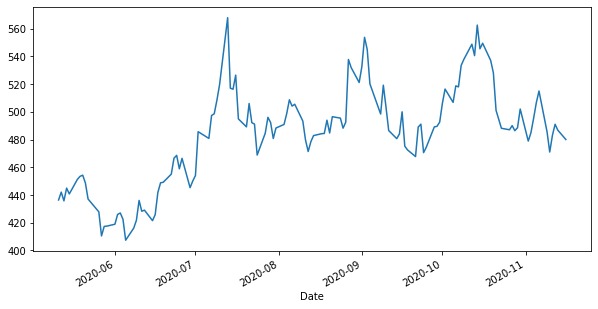

In [3]:
# Importe as dependências
import yfinance as yf
import matplotlib.pyplot as plt

# Imprima o gráfico
ticker_symbol = 'NFLX'
ticker_data = yf.Ticker(ticker_symbol)
ticker_df = ticker_data.history(period='1d', start='2020-05-11', end='2020-11-17')
ticker_df['Open'].plot(figsize=(10,5))


Imagem para postagem
https://miro.medium.com/max/598/1*OHOC7E43ajVEOM4YEQ6xNQ.png

Figura 1: Preços das ações da Netflix; eixo x: tempo, eixo y: preço em USD; Imagem do autor

Para calcular a estatística de teste, precisamos da (co-) variância empírica da série temporal, então definimos a seguinte função:



In [4]:
# Importe a Biblioteca necessária
import numpy as np

# Defina a função
def auto_cov(X,h):
    
    n = len(X)
    X_bar = np.mean(X)
    X_centered = X - X_bar
    return np.dot( X_centered[:(n-h)], X_centered[h:] ) / (n-h)

Agora é hora de definir o nível do teste (aqui α = 0,05), calcular a estatística de teste (com h = 5) e testar a hipótese nula:



In [5]:
# Chame a dependência necessária
from scipy.stats import chi2

#Defina o Nível de teste e calcule a estatística de teste e teste a hipótese nula
alpha = 0.05
quantile = chi2.ppf(q=1-alpha, df=5)
sum_of_autocov = 0
n = ticker_df.shape[0]

for h in np.arange(1,6):
    sum_of_autocov += auto_cov(ticker_df['Open'],h) ** 2

test_statistic = n * sum_of_autocov / ( auto_cov(ticker_df['Open'],0) ** 2 )

if test_statistic > quantile:
    print('The null hypothesis can be rejected.')
    print('TS = '  + str(np.round(test_statistic,2)) + ' > ' + str(np.round(quantile,2)))
else:
    print('The null hypothesis cannot be rejected.')
    print('TS = '  + str(np.round(test_statistic,2)) + ' <= ' + str(np.round(quantile,2)))

The null hypothesis can be rejected.
TS = 452.63 > 11.07


Não surpreendentemente, podemos rejeitar a hipótese nula de não correlação. A estatística de teste é 452,63 e o quantil 1-α da distribuição Qui-quadrado com 5 graus de liberdade é 11,07.
Essa descoberta faz sentido, pois os preços das ações geralmente dependem dos preços históricos. Ao contrário, os retornos são freqüentemente assumidos como não correlacionados. Portanto, testamos a não correlação dos retornos R (i) = X (i) -X (i-1).


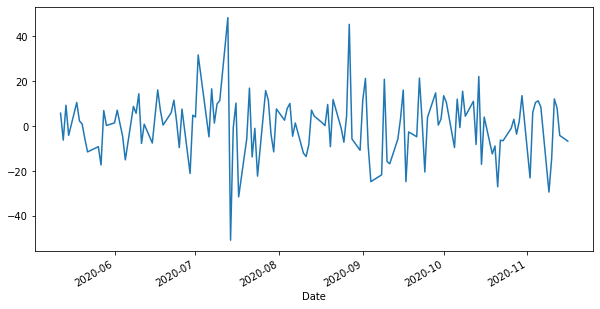

In [7]:
returns = ticker_df['Open'].diff()[1:]
returns.plot(figsize=(10,5));


Imagem para postagem
https://miro.medium.com/max/600/1*OB-vUJOXKp2bUfWkEKXE-Q.png

Figura 2: Retorno de ações da Netflix; eixo x: tempo, eixo y: retorna em USD; Imagem do autor

Calculando a estatística de teste como antes, temos outro resultado:



In [8]:

sum_of_autocov = 0
n = returns.shape[0]

for h in np.arange(1,6):
    sum_of_autocov += auto_cov(returns,h) ** 2

test_statistic = n * sum_of_autocov / ( auto_cov(returns,0) ** 2 )

if test_statistic > quantile:
    print('The null hypothesis can be rejected.')
    print('TS = '  + str(np.round(test_statistic,2)) + ' > ' + str(np.round(quantile,2)))
else:
    print('The null hypothesis cannot be rejected.')
    print('TS = '  + str(np.round(test_statistic,2)) + ' <= ' + str(np.round(quantile,2)))

The null hypothesis cannot be rejected.
TS = 8.82 <= 11.07


Para os retornos, não podemos rejeitar a hipótese nula como TS = 8,82, que é menor que o quantil 1-α da distribuição Qui-quadrado com 5 graus de liberdade.

Podemos concluir que os preços das ações da Netflix provavelmente estão correlacionados, mas os retornos parecem não estar correlacionados.

##Teste de estacionariedade em Python

Como antes, começamos carregando os dados.

E os dados devem ser os seguintes:


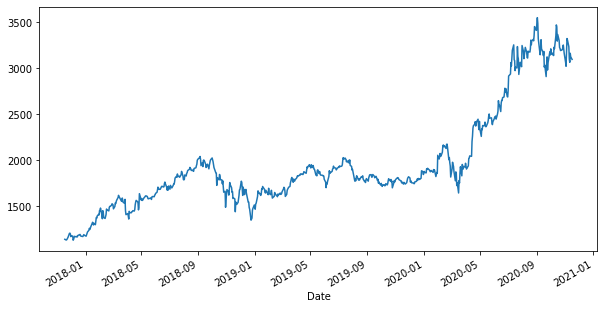

In [10]:
# Carregue os dados e visualize 
ticker_symbol = 'AMZN'
ticker_data = yf.Ticker(ticker_symbol)
ticker_df = ticker_data.history(period='1m', start='2017-11-17', end='2020-11-17')
ticker_df['Open'].plot(figsize=(10,5));

Imagem para postagem
https://miro.medium.com/max/604/1*KZThOx1yeJkxPtTuWAaNOg.png

Figura 3: Preços das ações da Amazon; eixo x: tempo, eixo y: preço em USD; Imagem do autor

É claro que há um componente de tendência na média, portanto, é improvável que a série temporal seja estacionária. Para a estatística de teste, definimos algumas funções auxiliares para calcular a estatística cusum, estimar a variância de longo prazo e aproximar o quantil.


In [11]:
def calculate_cusum(X):
    n = X.shape[0]
    X_cusum = ( np.cumsum(X) - np.arange(1,n+1)/n * np.sum(X) ) / n
    return X_cusum
  
def estimate_lrv(X):
    n = X.shape[0]
    m = round(n**(1/3))
    num_of_blocks = round(n/m)
    S = np.zeros(num_of_blocks)
    for i in range(num_of_blocks):
        S[i] = np.sum(X[(i*m+1):((i+1)*m)])
    return np.mean((np.diff(S) ** 2)/(2*m))

def simulate_quantile(alpha):
    num_of_bbs = 100000
    resolution = 1000
    dt = 1/resolution                                                    
    dt_sqrt = np.sqrt(dt)
    B = np.empty((num_of_bbs, resolution), dtype=np.float32)
    B[:, 0] = 0
    for n in range(resolution - 2):                                           
        t = n * dt
        eps = np.random.randn(num_of_bbs) * dt_sqrt
        B[:, n + 1] = B[:, n] * (1 - dt / (1 - t)) + eps
    B[:, -1] = 0
    quantile = np.sort(np.amax(B,axis=1))[round((1-alpha)*num_of_bbs)]
    return quantile


Agora, simplesmente precisamos conectar os dados e calcular a estatística de teste


In [12]:
n = ticker_df['Open'].shape[0]
quantile = simulate_quantile(alpha=0.05)
test_statistic = n**(1/2) * max(abs(calculate_cusum(ticker_df['Open'])))
lrv_estimator = estimate_lrv(ticker_df['Open'])

if test_statistic > quantile * lrv_estimator**(1/2):
    print('The null hypothesis can be rejected.')
else:
    print('The null hypothesis cannot be rejected.')

The null hypothesis can be rejected.



O test_statistic é maior do que quantil * lrv_estimator ** (1/2), então a hipótese nula deve ser rejeitada, o que não é surpresa.

No entanto, na literatura econométrica, os retornos de log (Fig. 4) são frequentemente considerados estacionários, portanto, também testamos esta hipótese:



In [13]:
log_returns = np.log(ticker_df['Open']).diff()[1:]

n = log_returns.shape[0]
test_statistic = n**(1/2) * max(abs(calculate_cusum(log_returns)))
lrv_estimator = estimate_lrv(log_returns)

if test_statistic > quantile * lrv_estimator**(1/2):
    print('The null hypothesis can be rejected.')
else:
    print('The null hypothesis cannot be rejected.')

The null hypothesis cannot be rejected.


Nesse caso, a hipótese nula não pode ser rejeitada, pois test_statistic é menor ou igual a quantil * lrv_estimator ** (1/2).

Podemos concluir que os preços das ações da Amazon são provavelmente não estacionários, mas os retornos logísticos parecem estar estacionários.



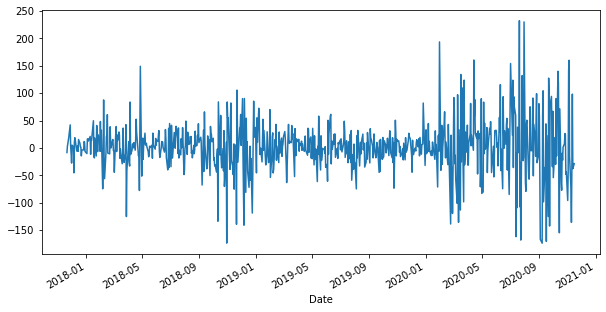

In [14]:
returns = ticker_df['Open'].diff()[1:]
returns.plot(figsize=(10,5));

Imagem para postagem
https://miro.medium.com/max/610/1*gFYSzRs3H3YHAPjpQpqoZA.png

Figura 4: Log Returns de ações da Amazon; eixo x: tempo, eixo y: log retorna; Imagem do autor

#Conclusão

As suposições de independência e estacionariedade simplificam a análise posterior das séries temporais. Ao trabalhar com métodos que requerem independência ou estacionariedade, por exemplo, ao prever o desenvolvimento futuro de uma série de tempo, precisamos validar essas suposições. Para isso, podemos usar testes do tipo Portmanteau e testes baseados na estatística CUSUM, respectivamente. Os testes podem ser implementados facilmente em Python, como vimos. Os testes têm nível α assintoticamente e são consistentes com grandes classes de alternativas.

Observe que se usarmos vários testes, precisamos corrigir os níveis dos testes por causa do [problema de teste múltiplo](https://en.wikipedia.org/wiki/Multiple_comparisons_problem).

Espero que esta breve introdução às séries temporais possa esclarecer os conceitos básicos e seja útil em sua futura análise de dados!

#Referências

[1] G. Box e D. Pierce, Distribution of Residual Autocorrelations in Autoregressive-Integrated Moving Average Time Series Models (1970), Journal of the American Statistical Association, 65 (332), 1509-1526. doi: 10.2307 / 2284333

[2] E. S. Page, Continuous inspect Schemes (1954), Biometrika 41 (1/2), 100-115.

[3] W. B. Wu e Z. Zhao, Inferência de tendências em séries temporais (2007), Jornal da Royal Statistical Society: Series B (Statistical Methodology) 69 (3), 391–410.

ESCRITO POR Florian Heinrichs
PhD em estatística matemática, pesquisador em análise de séries temporais, cientista de dados na indústria e entusiasta de python - linkedin.com/in/florian-heinrichs

